In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from tensorflow.examples.tutorials.mnist import input_data

In [4]:
mnist=input_data.read_data_sets("MNIST.data/")

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST.data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST.data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST.data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST.data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [60]:
trX, trY, teX, teY=mnist.train.images, mnist.train.labels, mnist.test.images, mnist.test.labels

In [56]:
class AutoEncoder(object):
    def __init__(self, m, n, eta=0.01):
        
        
         
        def encoder(self, x):
            h=tf.matmul(x, self._w1)+self._b1
            return tf.nn.sigmoid(h)
        
        def decoder(self, x):
            h=tf.matmul(x, self._w2)+self._b2
            return tf.nn.sigmoid(h)
        
        
        def set_session(self, session):
            self.session = session
            
        def reduced_dimension(self, x):
            h=self.encoder(x)
            return self.session.run(h, feed_dict={self._X: x})
        
        def reconstruct(self, x):
            h=self.encoder(x)
            r=self.decoder(h)
            return self.session.run(r, feed_dict={self._X: x})
        
        def fit(self, X, epochs=1, batch_size=100):
            N, D=X.shape
            num_batches=N//batch_size
            
            obj=[]
            for i in range(epochs):
                #X= shuffle(X)
                for j in range(num_batches):
                    batch=X[j*num_batches: (j*batch_size+batch_size)]
                    _, ob=self.session.run([self._opt, self._loss], feed_dict={self._X : batch})
                    if j%100 ==0 and i%100 ==0:
                        print('training epoch {0} batch {2} cost {1}'.format(i, ob, j))
                    obj.append(ob)
                    return obj
        
        
        #m = number if neurons in input_output_layer
        #n = number of neurons in hidden layer
        
        self._m= m
        self._n= n
        self.learning_rate=eta
        
        #Create the Computational graph
        
        #weights and biases
        
        self._w1=tf.Variable(tf.random_normal(shape=(self._m, self._n)))
        self._w2=tf.Variable(tf.random_normal(shape=(self._n, self._m)))
        
        self._b1=tf.Variable(np.zeros(self._n).astype(np.float32))  
        self._b2=tf.Variable(np.zeros(self._m).astype(np.float32))
        
        
        
        #placeholder for inputs
        self._X=tf.placeholder('float', [None, self._m])
        
        self.y=self.encoder(self._X)
        self.r=self.decoder(self.y)
        
        self._loss=tf.reduce_mean(tf.pow(error, 2))
        self._opt=tf.train.AdamOptimizer(self.learning_rate).minimize(self._loss)
        
       
                    
                    

In [57]:
Xtrain=trX.astype(np.float32)
Xtest= teX.astype(np.float32)
_, m= Xtrain.shape
#print(m)
print(_)

autoEncoder=AutoEncoder(m , 256)

#initialise all variables

init=tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    autoEncoder.set_session(sess)
    err=autoEncoder.fit(Xtrain, epochs=10)
    out=autoEncoder.reconstruct(Xtest[0:100])
    

55000


AttributeError: 'AutoEncoder' object has no attribute 'encoder'

In [61]:
plt.plot(err)
plt.xlabel('epochs')
plt.ylabel('cost')

NameError: name 'err' is not defined

NameError: name 'out' is not defined

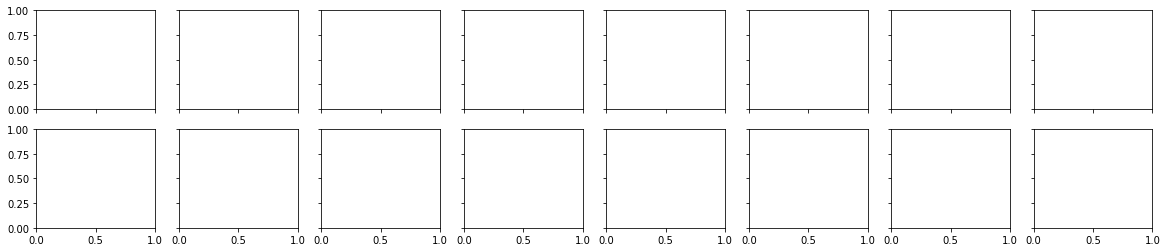

In [63]:
#plotting original and reconstucted images
row, col=2,8

idx=np.random.randint(0, 100, row*col//2)
x, axarr= plt.subplots(row, col, sharex=True, sharey=True, figsize=(20,4))

for fig, row in zip([Xtest, out], axarr):
    for i, ax in zip(idx, row):
        ax.imshow(fig[i].reshape((28, 28)))
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)